<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [0]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


### Merging data: example

## Merge data

In [0]:
# Create our 1st df
df_1 = pd.DataFrame({'Student': ['Peter', 'Zach', 'Jane'], 'Math Test Score': [75, 89, 82]})
df_1

,Student,Math Test Score
0,Peter,75
1,Zach,89
2,Jane,82


In [0]:
# Create our 2nd df
df_2 = pd.DataFrame({'Student':['Alice', 'Peter', 'Jane'], 'Biology Test Score': [78, 87, 90]})
df_2

,Student,Biology Test Score
0,Alice,78
1,Peter,87
2,Jane,90


In [0]:
# Merge df_1 to df_2
pd.merge(df_1, df_2, on='Student', how='inner')  # default is inner, automatically chooses common column by default

,Student,Math Test Score,Biology Test Score
0,Peter,75,87
1,Jane,82,90


In [0]:
# Outer merge
pd.merge(df_1, df_2, on='Student', how='outer')

,Student,Math Test Score,Biology Test Score
0,Peter,75.0,87.0
1,Zach,89.0,NaN
2,Jane,82.0,90.0
3,Alice,NaN,78.0


In [0]:
# Do a right on merge
pd.merge(df_1, df_2, on='Student', how='right')

,Student,Math Test Score,Biology Test Score
0,Peter,75.0,87
1,Jane,82.0,90
2,Alice,NaN,78


In [0]:
# Do a left on merge
pd.merge(df_1, df_2, on='Student', how='left')

,Student,Math Test Score,Biology Test Score
0,Peter,75,87.0
1,Zach,89,NaN
2,Jane,82,90.0


In [0]:
# 3rd df
df_3 = pd.DataFrame({'Name': ['Alice', 'Andrew', 'Jane'], 'Chemistry Test Score': ['A', 'B', 'C']})
df_3

,Name,Chemistry Test Score
0,Alice,A
1,Andrew,B
2,Jane,C


In [0]:
# Merge 2nd and 3rd df - error is thrown below because no common column 
pd.merge(df_2, df_3)

MergeError: ignored

In [0]:
# Choose the columns to use instead to avoid an error
pd.merge(df_2, df_3, left_on='Student', right_on='Name')  # now does inner join on columns we selected

,Student,Biology Test Score,Name,Chemistry Test Score
0,Alice,78,Alice,A
1,Jane,90,Jane,C


In [0]:
# There is Student and Name above but dont need both so drop 1 of them
pd.merge(df_2, df_3, left_on='Student', right_on='Name').drop(columns=['Student'])

,Biology Test Score,Name,Chemistry Test Score
0,78,Alice,A
1,90,Jane,C


In [0]:
# Reorder columns
df_4 = pd.merge(df_2, df_3, left_on='Student', right_on='Name') 

In [0]:
df_4[['Name', 'Biology Test Score', 'Chemistry Test Score']]

,Name,Biology Test Score,Chemistry Test Score
0,Alice,78,A
1,Jane,90,C


In [0]:
# Reassign back
df_4 = df_4[['Name', 'Biology Test Score', 'Chemistry Test Score']]
df_4

,Name,Biology Test Score,Chemistry Test Score
0,Alice,78,A
1,Jane,90,C


### **Merge Data**

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
# Check income shape
income.shape

(46513, 3)

In [0]:
# Check lifespan shape
lifespan.shape

(44370, 3)

In [0]:
# Merge income and lifespan df's
df = pd.merge(income, lifespan)
df.shape

(40437, 4)

In [0]:
# To show that pandas did this be default above
df = pd.merge(income, lifespan, on=['geo', 'time'], how='inner')
df.shape

(40437, 4)

In [0]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [0]:
#Merge df and population df's
df = pd.merge(df, population)

In [0]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
# look at entities df - dont have geo column but instead country column
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
# Merge entities with df
merged=pd.merge(df, entities, left_on='geo', right_on='country')
merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [0]:
# Lets make a subset with columns we want
subset_cols=['country', 'name', 'world_4region', 'world_6region']
merged=pd.merge(df, entities[subset_cols], left_on='geo', right_on='country')
merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [0]:
# dont need geo and country since same thing, drop geo column
subset_cols=['country', 'name', 'world_4region', 'world_6region']
merged=pd.merge(df, entities[subset_cols], left_on='geo', right_on='country').drop(columns=['geo'])
merged.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [0]:
# To make it easier to read, put drop columns in next line
subset_cols=['country', 'name', 'world_4region', 'world_6region']
merged=pd.merge(df, entities[subset_cols], left_on='geo', right_on='country')
merged= merged.drop(columns=['geo'])
merged.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [0]:
# Rename columns-  DataFrame.reaname(self, mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')
# Create mapping
mapping_1 = {
    'time': 'year',
    'country': 'country_code',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'population_total': 'population',
    'world_4region': '4region',
    'world_6region': '6region',
    'life_expectancy_years': 'lifespan'}
mapping_2 = { 'name': 'country'}


In [0]:
# Now merge and rename -- reassign it back to save it - needed two mappings because of same column name, country, fixed this way
merged = merged.rename(columns=mapping_1)
merged = merged.rename(columns=mapping_2)

In [0]:
merged.head()

,year,income,lifespan,population,country_code,country,4region,6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [0]:
merged.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


## Explore data

In [0]:
# lets look at dtypes 
merged.dtypes

year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object

In [0]:
# Look at categorical columns
merged.describe(exclude='number')

,country_code,country,4region,6region
count,40437,40437,40437,40437
unique,187,187,4,6
top,blz,Burkina Faso,africa,europe_central_asia
freq,219,219,11826,10778


In [0]:
merged['country'].unique

<bound method Series.unique of 0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
5        Afghanistan
6        Afghanistan
7        Afghanistan
8        Afghanistan
9        Afghanistan
10       Afghanistan
11       Afghanistan
12       Afghanistan
13       Afghanistan
14       Afghanistan
15       Afghanistan
16       Afghanistan
17       Afghanistan
18       Afghanistan
19       Afghanistan
20       Afghanistan
21       Afghanistan
22       Afghanistan
23       Afghanistan
24       Afghanistan
25       Afghanistan
26       Afghanistan
27       Afghanistan
28       Afghanistan
29       Afghanistan
            ...     
40407       Zimbabwe
40408       Zimbabwe
40409       Zimbabwe
40410       Zimbabwe
40411       Zimbabwe
40412       Zimbabwe
40413       Zimbabwe
40414       Zimbabwe
40415       Zimbabwe
40416       Zimbabwe
40417       Zimbabwe
40418       Zimbabwe
40419       Zimbabwe
40420       Zimbabwe
40421       Zimbabwe
404

In [0]:
# How many different country names that are unique
merged['country'].nunique()

187

In [0]:
# See how many times each country occurs
merged['country'].value_counts()

Burkina Faso             219
Armenia                  219
Mali                     219
Afghanistan              219
Czech Republic           219
Moldova                  219
Cameroon                 219
Tajikistan               219
Tonga                    219
Guinea                   219
Gambia                   219
Vanuatu                  219
Lao                      219
Costa Rica               219
Qatar                    219
Cape Verde               219
Rwanda                   219
Latvia                   219
Belize                   219
Egypt                    219
Australia                219
Kenya                    219
Barbados                 219
Kiribati                 219
France                   219
Belgium                  219
Burundi                  219
Slovak Republic          219
Peru                     219
Kazakhstan               219
                        ... 
United States            219
Sao Tome and Principe    219
Madagascar               219
Italy         

In [0]:
# lets subset our data and select countries we want
mask_usa = merged['country'] == 'United States'
usa = merged[mask_usa]

In [0]:
usa.head()

,year,income,lifespan,population,country_code,country,4region,6region
38028,1800,2127,39.41,6801854,usa,United States,americas,america
38029,1801,2167,39.41,6933517,usa,United States,americas,america
38030,1802,2202,39.41,7067728,usa,United States,americas,america
38031,1803,2166,39.41,7204538,usa,United States,americas,america
38032,1804,2165,39.41,7343995,usa,United States,americas,america


In [0]:
# See data for US for certain years
usa[usa['year'].isin([1818, 1918, 2018])]  # use isin to select values you want to see 

,year,income,lifespan,population,country_code,country,4region,6region
38046,1818,2258,39.41,9879049,usa,United States,americas,america
38146,1918,9371,47.18,106721812,usa,United States,americas,america
38246,2018,54898,79.14,326766748,usa,United States,americas,america


In [0]:
mask_china = merged['country'] == 'China'
china = merged[mask_china]
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country_code,country,4region,6region
6854,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


## Plot visualization

In [0]:
# Import seaborn
import seaborn as sns

In [0]:
# Subset df for this year only
#now = merged[merged['year'].isin([2018])]
#now.head()

,year,income,lifespan,population,country_code,country,4region,6region
218,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,2018,18942,76.97,44688864,arg,Argentina,americas,america


In [0]:
# Another way to do the above
now = merged[merged['year'] == 2018]
now.head()

,year,income,lifespan,population,country_code,country,4region,6region
218,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,2018,18942,76.97,44688864,arg,Argentina,americas,america


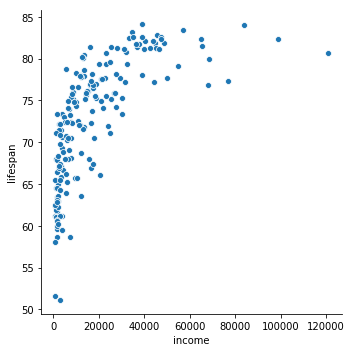

In [0]:
# plot of lifespan vs income
# Scatterplot can use lmplot
# Can use relplot to avoid the linear fitting and regression of lmplot
sns.relplot(x='income', y='lifespan', data=now);

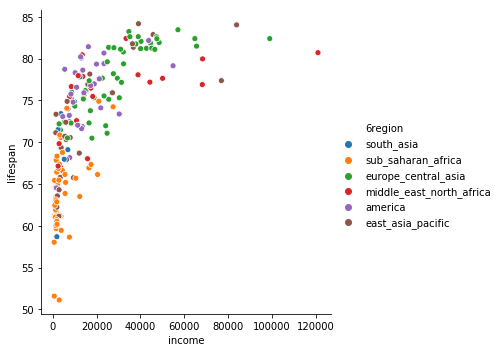

In [0]:
# lets represent different data points based on region using hue
sns.relplot(x='income', y='lifespan', hue='6region', data=now);

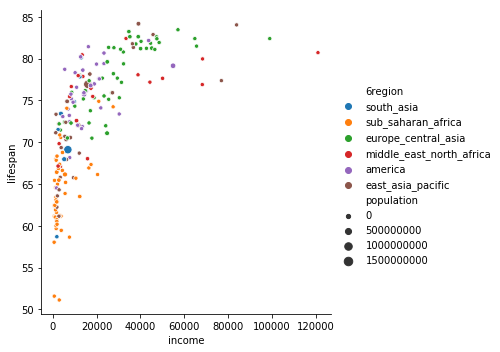

In [0]:
# Make circles proportional to population size
sns.relplot(x='income', y='lifespan', hue='6region', size='population', data=now);

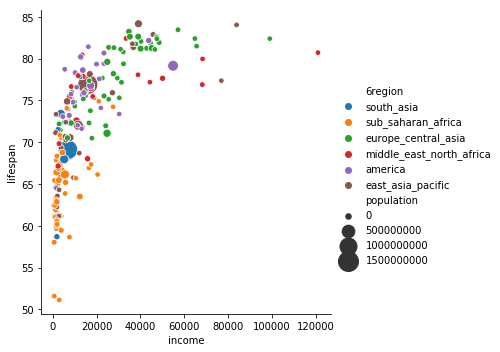

In [0]:
# Most still same size so lets tweak distribution of each one
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), data=now);

In [0]:
# lets scale it to see different magnitudes of income - can do below but that is new data to work with
np.log(now['income'])

218       7.532088
437       8.673513
656       9.427385
922      11.130654
1141      9.849137
1360      9.066701
1579      9.953943
1798     10.731668
2017     10.706498
2236      9.714262
2455      6.538140
2674     10.663358
2893      7.680176
3112      7.444249
3331      8.222016
3550      9.844427
3769     10.699417
3988      9.995155
4207      9.396986
4426      9.750278
4645      8.950273
4864      8.850088
5083      9.570878
5302      9.682654
5521     11.250820
5740      9.203215
5959      9.709114
6178      6.535241
6397     10.686772
6616     10.953137
           ...    
34085    10.339999
34304    10.768906
34523     8.936430
34742    10.223613
34961     7.972466
35180     7.525640
35399     7.298445
35618     9.735897
35837     7.980024
36056     9.790095
36275     7.304516
36494     8.612322
36713    10.319959
36932     9.358674
37151    10.121860
37370     7.930206
37589     7.505492
37808     9.027259
38027     9.964300
38246    10.913232
38465     8.808070
38684     9.

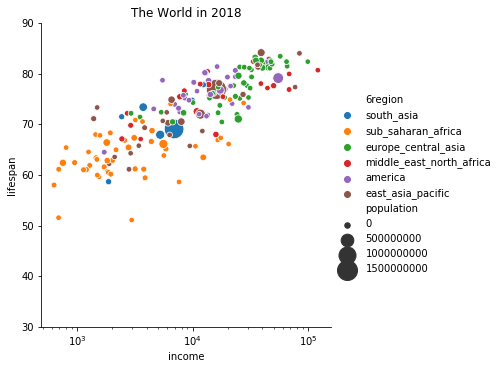

In [0]:
# A more efficent way is to provide a scale
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), data=now);
plt.xscale('log')
plt.ylim([30,90])
plt.title('The World in 2018');

## Analyze outliers

In [0]:
# Let's look at outliers in terms of income using sort values
now.sort_values('income')

,year,income,lifespan,population,country_code,country,4region,6region
32771,2018,629,58.03,15181925,som,Somalia,africa,sub_saharan_africa
6178,2018,689,51.58,4737423,caf,Central African Republic,africa,sub_saharan_africa
2455,2018,691,61.14,11216450,bdi,Burundi,africa,sub_saharan_africa
7711,2018,751,62.42,84004989,cod,"Congo, Dem. Rep.",africa,sub_saharan_africa
20898,2018,801,65.43,4853516,lbr,Liberia,africa,sub_saharan_africa
26420,2018,949,62.45,22311375,ner,Niger,africa,sub_saharan_africa
25763,2018,1134,61.03,19164728,mwi,Malawi,africa,sub_saharan_africa
25106,2018,1196,61.07,30528673,moz,Mozambique,africa,sub_saharan_africa
11262,2018,1252,64.56,5187948,eri,Eritrea,africa,sub_saharan_africa
13890,2018,1282,61.90,13052608,gin,Guinea,africa,sub_saharan_africa


In [0]:
now.sort_values('income', ascending=False)

,year,income,lifespan,population,country_code,country,4region,6region
30362,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa
22212,2018,99034,82.39,590321,lux,Luxembourg,europe,europe_central_asia
31895,2018,83888,84.03,5791901,sgp,Singapore,asia,east_asia_pacific
5521,2018,76943,77.36,434076,brn,Brunei,asia,east_asia_pacific
20241,2018,68359,79.96,4197128,kwt,Kuwait,asia,middle_east_north_africa
922,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
16956,2018,65622,81.49,4803748,irl,Ireland,europe,europe_central_asia
27296,2018,64846,82.39,5353363,nor,Norway,europe,europe_central_asia
6616,2018,57133,83.45,8544034,che,Switzerland,europe,europe_central_asia
38246,2018,54898,79.14,326766748,usa,United States,americas,america


In [0]:
# look at lifespan
now.sort_values('lifespan', ascending=False)

,year,income,lifespan,population,country_code,country,4region,6region
18708,2018,39105,84.17,127185332,jpn,Japan,asia,east_asia_pacific
31895,2018,83888,84.03,5791901,sgp,Singapore,asia,east_asia_pacific
6616,2018,57133,83.45,8544034,che,Switzerland,europe,europe_central_asia
11481,2018,34742,83.23,46397452,esp,Spain,europe,europe_central_asia
1798,2018,45783,82.87,24772247,aus,Australia,asia,east_asia_pacific
12576,2018,39006,82.62,65233271,fra,France,europe,europe_central_asia
18051,2018,35192,82.62,59290969,ita,Italy,europe,europe_central_asia
17613,2018,47356,82.60,337780,isl,Iceland,europe,europe_central_asia
17832,2018,33434,82.41,8452841,isr,Israel,asia,middle_east_north_africa
27296,2018,64846,82.39,5353363,nor,Norway,europe,europe_central_asia


In [0]:
# How do lifespan and income correlate

np.corrcoef(now['lifespan'], now['income']) # can pass in any order

# Will always have 1's on the diagonals, 2nd is lifespan correlated vs income, 2nd row is income correlated vs income
# Values range from -1 to 1. When you get a 1, then two things change together in same direction, -1 would be they move opposite
# So it tendency of two things to increase or decrease together at same time
# > .5 means they do move together, does not mean causation, just that they are moving together in same direction

array([[1.        , 0.67035369],
       [0.67035369, 1.        ]])

In [0]:
# Let's look at this correlation from 30 years ago, 1990
df_1990 = merged[merged['year']==1990]
np.corrcoef(df_1990['lifespan'], df_1990['income'])

array([[1.        , 0.56659012],
       [0.56659012, 1.        ]])

In [0]:
df_1850 = merged[merged['year']==1850]
np.corrcoef(df_1850['lifespan'], df_1850['income'])

array([[1.        , 0.49946112],
       [0.49946112, 1.        ]])

In [0]:
# If we want to extract the number from above, 0.49946112
np.corrcoef(df_1850['lifespan'], df_1850['income'])[0] # row 1 is 0 element

array([1.        , 0.49946112])

In [0]:
# To get just the number
np.corrcoef(df_1850['lifespan'], df_1850['income'])[0][1]  # row 1, 2nd column

0.49946112151578426

In [0]:
# Lets look at how this corr value changed over a certain range of years
years = range(1900, 2019)
corr_list = []
for year in years:
  df_year = merged[merged['year'] == year]
  corr = np.corrcoef(df_year['lifespan'], df_year['income'])[0][1]
  corr_list.append(corr)

corr_arr = np.array(corr_list)   # changes from a list to an array

In [0]:
# max
corr_arr.max()

0.7905186850299213

In [0]:
# Get index of the max value
np.argmax(corr_arr)  # gives an index, not max

34

In [0]:
# Change to a year array from a list
year_arr = np.array(years)

In [0]:
# put that index of 34 in and you will get the year
year_arr[34]

1934

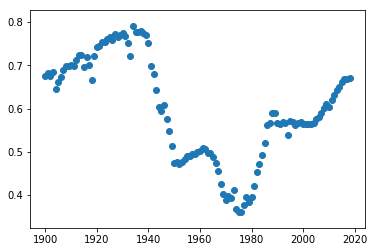

In [0]:
# How it changes
plt.scatter(year_arr, corr_arr)

In [0]:
# Let's look at some outliers, highest per person income from Qatar - lets put name next to the datapoint
now_qatar = now[now['country']=='Qatar']
now_qatar.head()

,year,income,lifespan,population,country_code,country,4region,6region
30362,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


In [0]:
# Lets get the x and y values for Qatar income/lifespan
now_qatar['income'], now_qatar['lifespan']

(30362    121033
 Name: income, dtype: int64, 30362    80.71
 Name: lifespan, dtype: float64)

Text(120000, 80, 'Qatar')

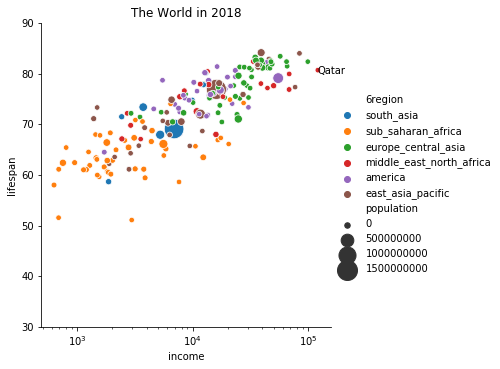

In [0]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), data=now);
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018')
plt.text(120000, y=80, s='Qatar')

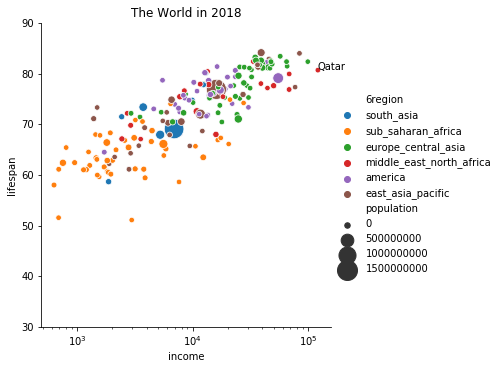

In [0]:
# Better way is to get the x and y values at that point for Qatar
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), data=now);
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018')
plt.text(x=now_qatar['income'].values[0],
         y=now_qatar['lifespan'].values[0],
         s='Qatar');

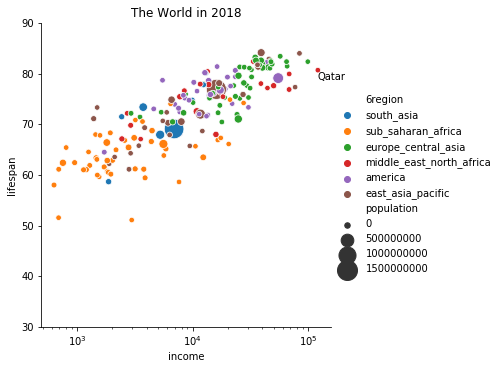

In [0]:
# To move Qatar off the datapoint, subtract in years for lifespan and thousands for income
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), data=now);
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018')
plt.text(x=now_qatar['income'].values[0] - 2000,
         y=now_qatar['lifespan'].values[0] - 2,
         s='Qatar');

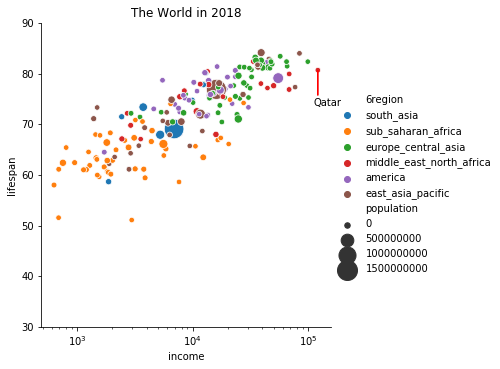

In [0]:
# Move Qatar text down and create an arrow to point
sns.relplot(x='income', y='lifespan', hue='6region', size='population', sizes=(30,400), data=now);
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018')
plt.text(x=now_qatar['income'].values[0] - 10000,
         y=now_qatar['lifespan'].values[0] - 7,
         s='Qatar');
plt.arrow(x=now_qatar['income'].values[0],   # Arrow -  plt.arrow(x,y, dx, dy, **kwargs)    dx, dy is the length
         y=now_qatar['lifespan'].values[0],
         dx=0,
         dy=-5,
         color='r',
         length_includes_head=True,
         head_width=12.08, head_length=0.00002);

In [0]:
# figure out how to make an arrowhead for homework


## Plot multiple years

In [0]:
# choose years we want
years = [1918, 1948, 1978, 2008]

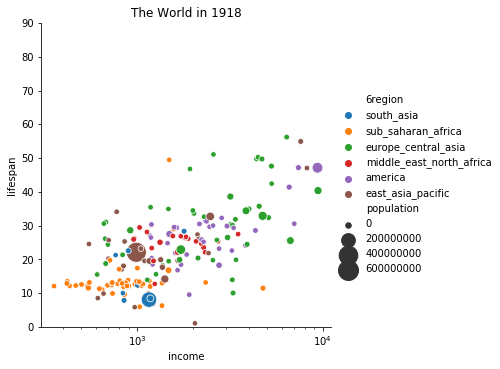

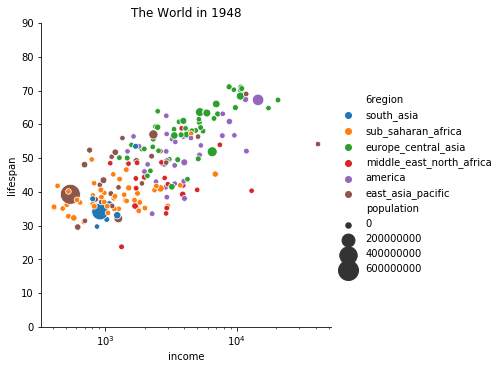

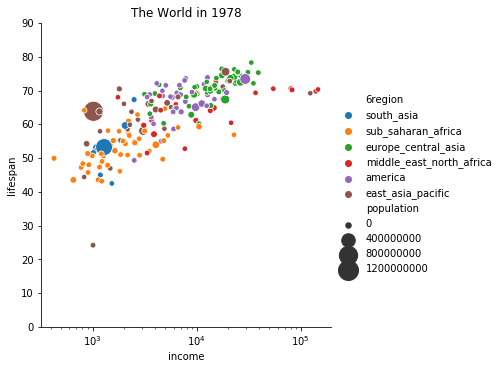

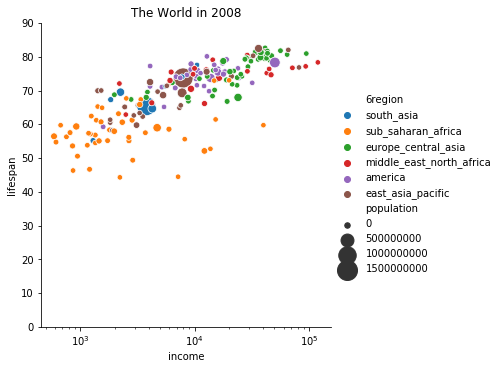

In [0]:
# subset our data
# iterate years 

for year in years:
  df_year = merged[merged['year'] == year]
  sns.relplot(x='income', 
            y='lifespan', 
            hue='6region', 
            size='population', 
            sizes=(30,400), 
            data=df_year);
  plt.xscale('log')
  plt.ylim([0, 90])
  plt.title(f'The World in {year}')

## Point out a story

In [0]:
# Recreate same thing with plotly (2 types- plotly and plotly express (simplified code for plotly))
import plotly.express as px

In [0]:
# create scatter - very basic but interactive
px.scatter(merged, x='income', y='lifespan')

In [0]:
px.scatter(merged, 
           x='income',
           y='lifespan',
           size = 'population',
           size_max=55,
           animation_frame='year',
           # same as hue in pandas
           color='6region',  
           log_x=True,
           hover_name='country')